# Model Penyebaran Virus

Deskripsi lalala

## Module

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

## Data

Data diperoleh dari [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) dan [Wikipedia](https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_on_cruise_ships). Disini, data disajikan secara kumulatif per hari. Setiap kolom secara berturut-turut menandakan banyak individu yang terinfeksi, banyak kasus fatal, dan banyak kasus sembuh.

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,10,20,61,64,70,135,135,175,175,218,...,706,706,706,706,706,706,706,706,706,712
1,0,0,0,0,0,0,0,0,0,0,...,6,6,7,7,7,7,7,7,7,7
2,0,0,0,0,0,0,0,0,0,0,...,40,40,325,325,325,325,325,325,325,325


Kita tertarik untuk mencocokkan model SIR dengan banyaknya kasus infected setiap harinya. Dengan kata lain, banyak kasus terinfeksi dikurangi dengan banyak kasus fatal dan kasus sembuh.

In [3]:
infected = data['0'] - (data['1'] + data['2'])

## Plot

Btw, model SIR kita naon? saat ini, yang kasus fatal urang masukkan ke kompartemen recovered

$\begin{eqnarray*}
\frac{dS}{dt}&=&-\frac{\beta IS}{N}\\ 
\frac{dI}{dt}&=&\frac{\beta IS}{N}-\gamma I\\ 
\frac{dR}{dt}&=&\gamma I
\end{eqnarray*}$

In [4]:
# ini fungsi untuk ngeplot SIR berdasarkan nilai beta dan gamma mereka
def plotSIR(beta, gamma):   

    # model SIR, diferensial
    N = 3711
    def SIR(t,y):
        S, I, R = y
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    # solving secara numerik
    sol = solve_ivp(SIR, [0, 43], [N, 10, 0],
                    t_eval=np.arange(0, 43.1, 0.1))

    # plotting
    fig = plt.figure(figsize=(12,4))
    plt.plot(sol.t,sol.y[0])
    plt.plot(sol.t,sol.y[1])
    plt.plot(sol.t,sol.y[2])
    plt.plot(np.arange(0,43), infected, "k*:")
    plt.grid("True")
    plt.legend(["Susceptible","Infected","Removed","Original Data"])

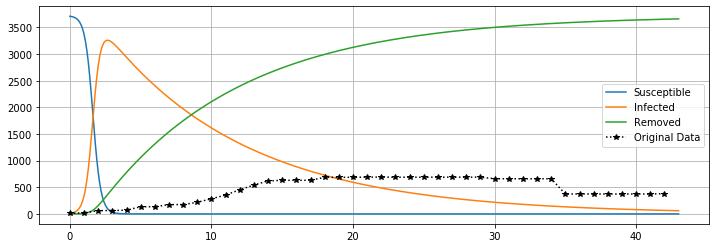

In [5]:
plotSIR(0.001, 0.1)

## Best Fit

In [6]:
# mencari model yang cocok dengan meminimalkan Sum Square of Error
def SSE(p):

    # kodingan masih sama
    beta, gamma = p
    N = 3711
    def SIR(t,y):
        S, I, R = y
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    
    # ngesolve numerik juga masih sama
    sol = solve_ivp(SIR, [0, 43], [3711, 10, 0],
                    t_eval=np.arange(0, 43.1, 0.1))

    # outputkan galat: sum square of error
    return(sum((sol.y[1][:-1:10]-infected)**2))

In [8]:
# waktunya MA3071 Pengantar Optimisasi
msol = minimize(SSE, [0.001, 1], method='Nelder-Mead')
print('beta  : {}\ngamma : {}'.format(msol.x[0], msol.x[1]))

beta  : 0.00011904255374762977
gamma : 0.17791373080182998


yep, itu nilai yang paling cocok dengan data di lapangan. berikut plotnya

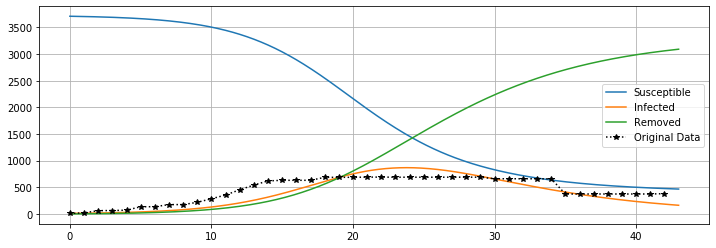

In [9]:
plotSIR(0.00011904255374762977, 0.17791373080182998)